# Exercise 7 and 8
by Lawrence Lechuga
02/24/21

## Import packages

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import numpy as np
import skimage as sk
from skimage import io, filters, exposure, segmentation
import SimpleITK as sitk

### Create a SimpleITK based viewer
We are using the GetArrayViewFromImage() function from Simple ITK in order to convert an simpleITK based image into a numpy ndarray that we can view using matplotlib's pyplot.imshow.

***SimpleITK Image notes:***
1. We can get help on any of these modules using: >>> help('ModuleName').
2. SimpleITK imaging basics for those interested
    - http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/01_Image_Basics.html
    - http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/02_Pythonic_Image.html
 

In [2]:
def sitkshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda,cmap='gray')

## Set Path to image 
Set your path to the appropriate image in the cell below. 

Note: If this work is being launched from mybinder, then path should be set correctly from the start.

In [3]:
image_path = 'ITK_Images/'
img = 'BrainProtonDensitySlice6.png'
filename = os.path.join(image_path,img)

## Read in image and display
We will first read in the image using sitk.ReadImage() function.
I will load the "BrainProtonDensitySlice6.png" in as sitk based 32-bit float, or "sitk.sitkFloat32", then display using our custom function.

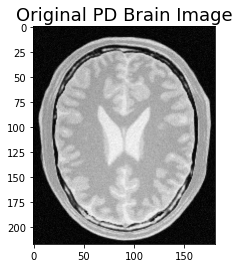

In [4]:
brain = sitk.ReadImage(filename,sitk.sitkFloat32)
I0 = sitkshow(brain)
plt.title('Original PD Brain Image',FontSize =18)
plt.show()

## Preprocessing
In order to have a segmentation algorithm that performs optimally, we will need to process the images prior to segmentation. Lets start with smoothing the image.
### 1. Reduce Noise
We will reduce noise by using SimpleITK's "Curvature anisotropic diffusion image filter". The module SimpleITK.CurvatureAnisotropicDiffusionImageFilter() is a class that mimics (or is a proxy of) C++ itk::simple::CurvatureAnisoptropicDiffusionImageFilter class.

This python class object that I define below as CADIF, has many methods within it. If youre unfamiliar with classes and objects, think of it as a more efficiently way of grouping functionality and data together. If interested, https://docs.python.org/3/tutorial/classes.html has a great description of classes.

#### 1.1 Action Required:
Have students set different attributes and try different values.

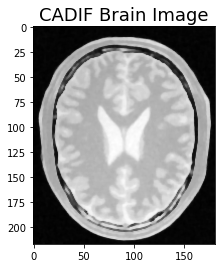

In [7]:
CADIF = sitk.CurvatureAnisotropicDiffusionImageFilter()
CADIF.SetTimeStep = 0.125
CADIF.SetNumberOfIterations = 5
CADIF.SetConductanceParameter = 9.0
brain_filt = CADIF.Execute(brain)
I1 = sitkshow(brain_filt)
plt.title('CADIF Brain Image',FontSize =18)
plt.show()

### 2. Create a gradient image
Now that our image is filtered to remove some noise, we can determine our edges much more effectively. To find the edges of our image we will be using SimpleITK's "Gradient Magnitude Recursive Gaussian Image Filter".  The module SimpleITK.GradientMagnitudeRecursiveGaussianImageFilter() is a class that mimics (or is a proxy of) C++ itk::simple::GradientMagnitudeRecursiveGaussianImageFilter class. As you can see, very similar to the structure of the previous section.

#### Action Required:
Create something for the students to do here. Possibly have them show different values of sigma in a subplot?

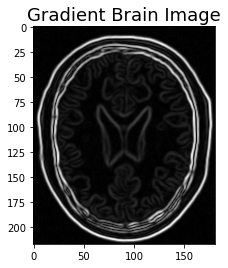

In [17]:
GF = sitk.GradientMagnitudeRecursiveGaussianImageFilter()
GF.SetSigma = 1.0
brain_edge = GF.Execute(brain_filt)

I2 =sitkshow(brain_edge)
plt.title('Gradient Brain Image',FontSize =18)
plt.show()

### 3. Normalize magnitude
Lastly, we will normalize the magnitude using a sigmoid filter. This filter will take in each pixel and tranform its value based on the sigmoid function:
\begin{equation}
f(x) = (Max - Min)\cdot \frac{1}{1+ e^{-\frac{x-\beta}{\alpha}}}+ Min
\end{equation}


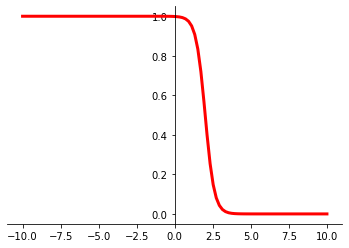

In [41]:
# small function to visualize the parameter effects
def sigmoid(MIN=0.0, MAX=1.0, ALPHA=-0.3, BETA=2.0):
    X = np.linspace(-10,10,100)
    Y = (MAX-MIN)*1/(1+np.exp(-(X-BETA)/ALPHA))+MIN
    return Y
y = sigmoid()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x,y, 'r',LineWidth=3.0)
plt.show()

In [42]:
help(sitk.SigmoidImageFilter)

Help on class SigmoidImageFilter in module SimpleITK.SimpleITK:

class SigmoidImageFilter(ImageFilter)
 |  Proxy of C++ itk::simple::SigmoidImageFilter class.
 |  
 |  Method resolution order:
 |      SigmoidImageFilter
 |      ImageFilter
 |      ProcessObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Execute(self, image1)
 |      Execute(SigmoidImageFilter self, Image image1) -> Image
 |  
 |  GetAlpha(self)
 |      GetAlpha(SigmoidImageFilter self) -> double
 |  
 |  GetBeta(self)
 |      GetBeta(SigmoidImageFilter self) -> double
 |  
 |  GetName(self)
 |      GetName(SigmoidImageFilter self) -> std::string
 |  
 |  GetOutputMaximum(self)
 |      GetOutputMaximum(SigmoidImageFilter self) -> double
 |  
 |  GetOutputMinimum(self)
 |      GetOutputMinimum(SigmoidImageFilter self) -> double
 |  
 |  SetAlpha(self, Alpha)
 |      SetAlpha(SigmoidImageFilter self, double Alpha)
 |  
 |  SetBeta(self, Beta)
 |      SetBeta(SigmoidImageFilter self, double Beta)
 |  
